# Analyser des données de systèmes éducatifs

## Chargement des librairies et des datasets

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pip
%matplotlib inline

!pip install --user pandas
import pandas as pd
print('Version de pandas: ', pd.__version__)

# Chargement

pd.set_option('display.max_columns', 1800)
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_colwidth', None)

EdStatsCountry = pd.read_csv("EdStatsCountry.csv")
EdStatsCountrySeries = pd.read_csv("EdStatsCountry-Series.csv")
EdStatsData = pd.read_csv("EdStatsData.csv")
EdStatsFootNote = pd.read_csv("EdStatsFootNote.csv")
EdStatsSeries = pd.read_csv("EdStatsSeries.csv")

Version de pandas:  1.2.4


Nous allons commencer par regarder la forme est les différentes variables de chaque dataset, afin de voir les informations qui
permettront de former notre Dataset.

Le dataset entier est constitué de 5 datasets distincts:

    - EdStatsCountry
    - EdStatsCountrySeries
    - EdStatsData
    - EdStatsFootNote
    - EdStatsSeries

## EdStatsCountry

In [2]:
EdStatsCountry.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


Regardons les différentes informations pour ce dataset, comme le nombre de lignes, de colonnes, le taux de NaN pour chaque colonne:

In [3]:
formeCountry = EdStatsCountry.shape
print('Le dataset a', formeCountry[0], 'lignes et', formeCountry[1], 'colonnes.')
for i in range(formeCountry[1]):
    count_nan = 0
    for j in range(formeCountry[0]):
        if EdStatsCountry.isna().values[j][i]:
            count_nan += 1         
            #print(i,j)
    print('La colonne', [EdStatsCountry.columns[i]], 'du dataset EdStatsCountry a', (count_nan/formeCountry[0])*100, '% de données manquantes.')

Le dataset a 241 lignes et 32 colonnes.
La colonne ['Country Code'] du dataset EdStatsCountry a 0.0 % de données manquantes.
La colonne ['Short Name'] du dataset EdStatsCountry a 0.0 % de données manquantes.
La colonne ['Table Name'] du dataset EdStatsCountry a 0.0 % de données manquantes.
La colonne ['Long Name'] du dataset EdStatsCountry a 0.0 % de données manquantes.
La colonne ['2-alpha code'] du dataset EdStatsCountry a 1.2448132780082988 % de données manquantes.
La colonne ['Currency Unit'] du dataset EdStatsCountry a 10.78838174273859 % de données manquantes.
La colonne ['Special Notes'] du dataset EdStatsCountry a 39.83402489626556 % de données manquantes.
La colonne ['Region'] du dataset EdStatsCountry a 11.20331950207469 % de données manquantes.
La colonne ['Income Group'] du dataset EdStatsCountry a 11.20331950207469 % de données manquantes.
La colonne ['WB-2 code'] du dataset EdStatsCountry a 0.4149377593360996 % de données manquantes.
La colonne ['National accounts base ye

Dans un premier temps nous pouvons voir quelques clés potentielles, bien sûr il faudra voir les autres datasets.
Ici Country Code, les colonnes Name, Currency Unit, Region et Income Group peuvent sembler intéressant, on les garde dans un coin de l'esprit.

In [4]:
listeRegion = EdStatsCountry['Region'].dropna().unique()
print(listeRegion)

['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']


Ce dataset nous donne des informations globales sur l’économie de chaque pays du monde. Quelques valeurs manquantes pour les variables intéressantes, aucun doublon

## EdStatsCountrySeries

In [5]:
EdStatsCountrySeries.head(2)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN


Nous voyons que nous pourrons utiliser CountryCode afin de lier les 2 datasets précédent. Pour ce dataset, nous n'avons pas de variables réellement intéressantes pour notre problématique. Mais je répète c'est une analyse très rapide des dataset pour le moment, nous nous y plongerons plus en détail par la suite
Ce dataset nous donne des informations sur les données contenues dans EdStatsCountry.csv

In [6]:
formeCountrySeries = EdStatsCountrySeries.shape
print('Le dataset a', formeCountrySeries[0], 'lignes et', formeCountrySeries[1], 'colonnes.')

Le dataset a 613 lignes et 4 colonnes.


Pas de données manquantes, aucun doublon (sauf pour la dernière varible qui est uniquement rempli de valeur NaN).

## EdStatsData

In [7]:
EdStatsData.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous pourrons ici utiliser les variables Country Name ou Country Code pour lier les 3 datasets précédent ensemble.
Ce dataset va être intéressant dans la mesure où il va nous renseigner sur différents indicateurs qui seront utiles pour
notre problématique. Nous pouvons voir que dans 'Country Name' nous avons comme des region en guise de nom de pays, voyon voir combien il y en a:

In [8]:
listePaysData = EdStatsData['Country Name'].dropna().unique()

Nous voyons qu'il y a effectivement plusieurs region en terme de nom de pays, par exemple:  
'Arab World', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', ... 

Nous allons garder ces regions a part, ça nous servira plus tard:

In [9]:
listeZone = ['Arab World', 'East Asia & Pacific',  'East Asia & Pacific (excluding high income)', 'Euro area',
                   'Europe & Central Asia', 'Europe & Central Asia (excluding high income)', 'European Union',
                   'Heavily indebted poor countries (HIPC)', 'High income',  'Latin America & Caribbean', 
                   'Latin America & Caribbean (excluding high income)', 'Least developed countries: UN classification',
                   'Low & middle income',  'Low income', 'Lower middle income', 'Middle East & North Africa',
                   'Middle East & North Africa (excluding high income)', 'Middle income',  'North America', 'OECD members', 
                   'South Asia',  'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)', 'Upper middle income', 
                   'World', 'East Asia & Pacific (developing only)', 'East Asia & Pacific (all income levels)',
                   'Europe & Central Asia (developing only)', 'Europe & Central Asia (all income levels)', 'Latin America & Caribbean (developing only)',
                   'Latin America & Caribbean (all income levels)', 'Middle East & North Africa (all income levels)', 
                   'Middle East & North Africa (developing only)', 'Sub-Saharan Africa (developing only)', 'Sub-Saharan Africa (all income levels)']

De ce fait la liste des pays va être un peu modifiée: 

In [10]:
listePays = EdStatsCountry[~EdStatsCountry['Short Name'].isin(listeZone)]['Short Name'].unique()

Nous pourrons utiliser ici Country Code pour lier les datasets. Ce dataset non plus ne va pas nous être d'une grande aide à la vue des différentes variables. 
Ce dataset nous donne des information sur l’évolution de nombreux indicateurs pour les pays et zone de EdStatsCountry.csv

In [11]:
formeData = EdStatsData.shape
print('Le dataset a', formeData[0], 'lignes et', formeData[1], 'colonnes.')

Le dataset a 886930 lignes et 70 colonnes.


Beaucoup de données manquantes, aucun doublon.

## EdStatsFootNote

In [12]:
EdStatsFootNote.head(2)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN


Nous pourrons utiliser ici Country Code pour lier les fichiers.
Ce dataset non plus ne va pas nous être d'une grande aide à la vue des différentes variables. 
Ce dataset nous donne des informations sur les années d’origine des données.

In [13]:
formeFootNote = EdStatsFootNote.shape
print('Le dataset a', formeFootNote[0], 'lignes et', formeFootNote[1], 'colonnes.')

Le dataset a 643638 lignes et 5 colonnes.


Pas de données manquantes, aucun doublon (sauf pour la dernière varible qui est uniquement rempli de valeur NaN).

## EdStatsSeries

In [14]:
EdStatsSeries.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous pourrons utiliser les variables Indicator Name ou Series Code afin de lier les datasets.
Ce dataset va être intéressant pour avoir une idée des différents indicateurs, mais pour notre dataset il ne servira pas.

Ce dataset nous donne des informations sur les indicateurs dans EdStatsData.csv.

In [15]:
formeSeries = EdStatsSeries.shape
print('Le fichier a', formeSeries[0], 'lignes et', formeSeries[1], 'colonnes.')

Le fichier a 3665 lignes et 21 colonnes.


Beaucoup de données manquantes, aucun doublon.

Après cette étude très rapide des différents datasets, nous pouvons voir qu'il y a déjà pas mal de données manquantes, 
on ne peut pas encore inférer par rapport aux doublons à ce niveau.
Il sera aussi intéressant de regarder à quoi correspond chaque variable afin de voir si elle est utile pour notre problème, en
effet, comme nous pouvons le voir rapidement, on pourrait rassembler ces 5 datasets en 1 seul, mais on se retrouverait
avec un fichier énorme contenant plein d'information inutile pour notre problématique.
A vu d'oeil il va y avoir 2 fichiers importants, le fichier EdStatsCountry et EdStatsData, mais les 3 autres ne sont pas
nécessairement à jeter.

Les informations importantes dans EdStatsData vont être les indicateurs, qui nous renseignerons sur d'éventuels indicateurs 
liés à l'éducation, nous allons dans un premiers temps regarder la liste des différents indicateurs.

In [16]:
Data = EdStatsData['Indicator Name'].dropna().unique()
print("Il y a ", Data.shape[0], " indicateurs différents.")

Il y a  3665  indicateurs différents.


Nous pouvons dans un premier temps faire une jointure sur nos 2 tables intéressantes puis regardés rapidement pour quelles 
années nous avons le plus de données.

In [17]:
dataset1 = pd.merge(EdStatsData, EdStatsCountry) 
dataset1 = dataset1.rename(columns={"Short Name":"Nom Pays"})
dataset1 = dataset1.drop(columns=["Long Name", "Table Name"])
dataset1.drop(['2-alpha code', 'Currency Unit', 'Special Notes', 'WB-2 code', 'Country Name', 'National accounts base year', 'National accounts reference year', 'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Income Group', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data', 'Unnamed: 31','Unnamed: 69'], axis = 1, inplace = True)  

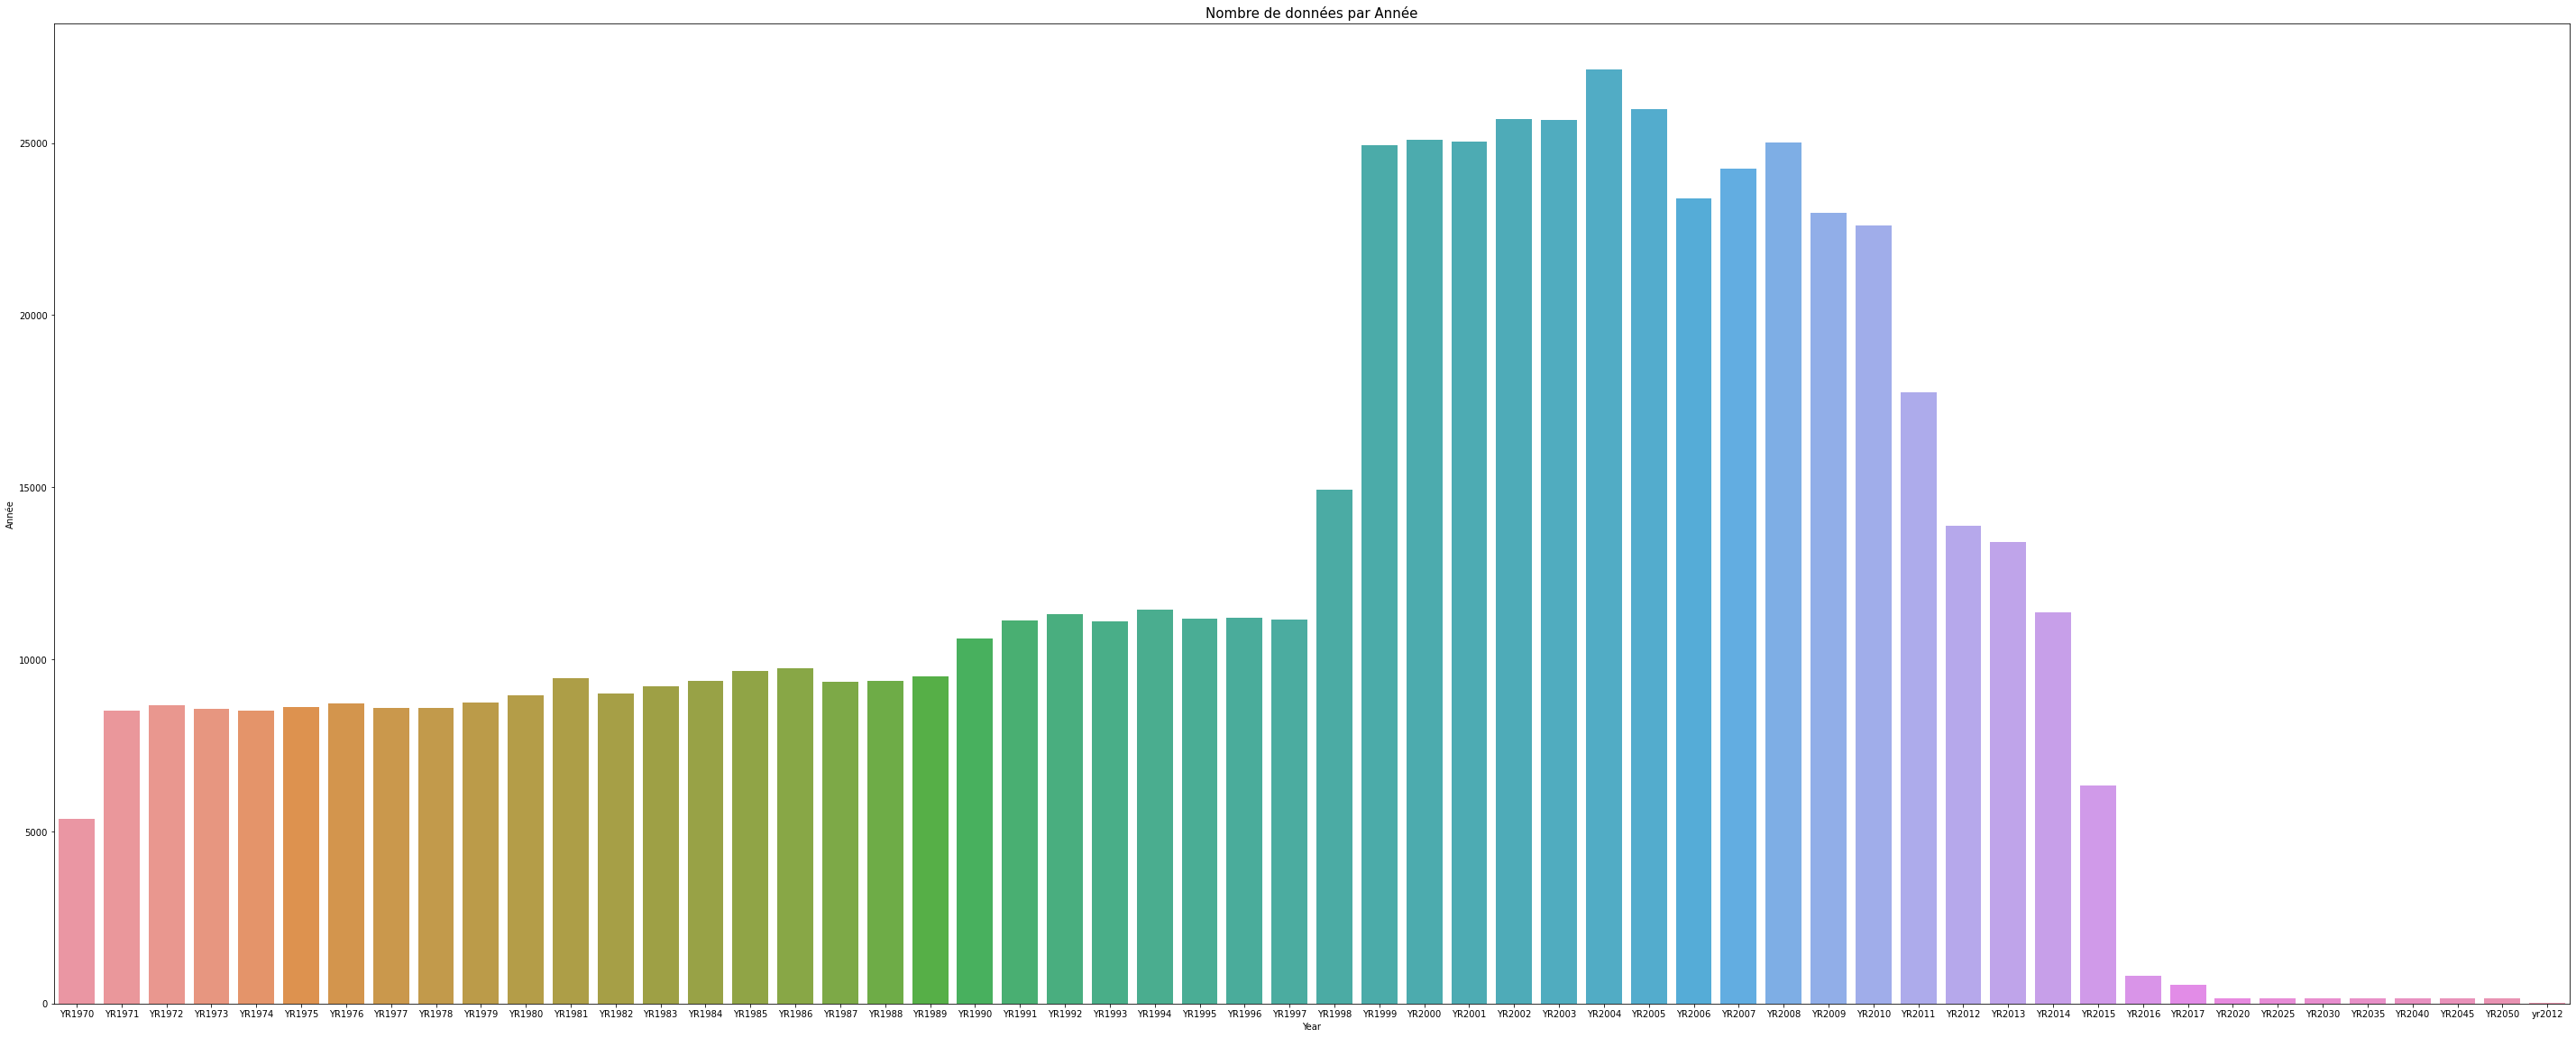

In [18]:
plt.figure(figsize = (50, 20))
plt.title('Nombre de données par Année', size=15)
plt.xlabel('Nombre de données')
plt.ylabel('Année')

sns.barplot(x = EdStatsFootNote.groupby('Year')[['CountryCode']].count().sum(axis = 1).index,
            y = EdStatsFootNote.groupby('Year')[['CountryCode']].count().sum(axis = 1).values)

plt.show()

Il faut choisir quelques indicateurs qui nous aiderons à répondre à la problématique.
Pour cela nous nous rendons sur le site de l'organisme afin de les choisir.
Les indicateurs intéressants seront ceux qui concernent le nombre d'étudiant, l'utilisation d'internet, la 
population des 15-24ans, bien que l'on puisse suivre une formation après 24ans, pour moi l'indicateur de population total
n'est pas très pertinent dans la mesure où on n'aura pas d'information complémentaire, hormis le pourcentage d'étudiant par
pays. Le revenu et le taux de chômage seront également intéressants, puisqu'en fonction de cela on pourra inférer si 
oui ou non un habitant pourra suivre une formation, au chômage on peut suivre une formation Openclassroom par exemple, cette
formation a un coup, savoir le revenu moyen par habitant sera donc intéressant.

Nous avons fait notre choix sur quelques indicateurs, qui seront:

    - Population, ages 15-24, total
    - Internet users (per 100 people)
    - Government expenditure on education as % of GDP (%)
    - Enrolment in tertiary education, all programmes, both sexes (number)
    - Enrolment in upper secondary education, both sexes (number)
    - GDP per capita (current US$)
    - Unemployment, total (% of total labor force)

In [19]:
listeIndicateurGardés = ['Population, ages 15-24, total', 
                         'Internet users (per 100 people)', 
                         'Government expenditure on education as % of GDP (%)',
                         'Enrolment in tertiary education, all programmes, both sexes (number)',  
                         'Enrolment in upper secondary education, both sexes (number)',
                         'GDP per capita (current US$)',
                         'Unemployment, total (% of total labor force)']

Nous allons regarder pour quelle année nous avons nos dernière valeurs pour chaque indicateurs, nous allons dans un premier 
temps réduire un peu le dataset, nous avons vu qu'avant 2000, nous n'avions pas beaucoup de données, nous pouvons donc
nous passer des années précédents 2000, de plus comme nous cherchons la dernière valeurs de chaque indacateurs ça ne sert 
à rien de garder trop d'année, nous allons nous focaliser sur les années 2010 - 2017.

In [20]:
dataset_Indicateur = dataset1[dataset1['Indicator Name'].isin(listeIndicateurGardés)].copy()
dataset_Indicateur1 = dataset_Indicateur.groupby(['Indicator Name', 'Indicator Code']).count().reset_index()
dataset_Indicateur1.drop(['Nom Pays', 'Region', 'Country Code', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100'], axis = 1, inplace = True)
dataset_Indicateur.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100'], axis = 1, inplace = True)
dataset_Indicateur = dataset_Indicateur[['Nom Pays', 'Region', 'Country Code', 'Indicator Name', 'Indicator Code', '2010', '2011', '2012', '2013', '2014', '2015', '2016']]
dataset_Indicateur = dataset_Indicateur[dataset_Indicateur['Nom Pays'].isin(listePays)]

print(dataset_Indicateur1)

                                                         Indicator Name  \
0  Enrolment in tertiary education, all programmes, both sexes (number)   
1           Enrolment in upper secondary education, both sexes (number)   
2                                          GDP per capita (current US$)   
3                   Government expenditure on education as % of GDP (%)   
4                                       Internet users (per 100 people)   
5                                         Population, ages 15-24, total   
6                          Unemployment, total (% of total labor force)   

      Indicator Code  2010  2011  2012  2013  2014  2015  2016  2017  
0        SE.TER.ENRL   165   167   166   156   149   115     7     0  
1            UIS.E.3   174   179   177   165   143     7     0     0  
2     NY.GDP.PCAP.CD   228   228   224   225   219   218   211     0  
3  SE.XPD.TOTL.GD.ZS   127   121   113   118    89    44     4     0  
4     IT.NET.USER.P2   227   229   227   226

Nous pouvons voir rapidement que l'année 2016 et 2017 peuvent être mise de côté car il manque des valeurs pour ces 2 années,
Nous nous focaliserons sur les années 2015 et 2014 dans le cas on il nous manquerait des valeurs pour 1 ou 2 indicateurs.
Pour cela nous allons faire une fonction qui va nous renvoyer la dernière valeurs pour chaque indicateur.

In [21]:
dataset_Indicateur.head(2)

,Nom Pays,Region,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016
92829,Afghanistan,South Asia,AFG,"Enrolment in tertiary education, all programmes, both sexes (number)",SE.TER.ENRL,NaN,97504.0,NaN,NaN,262874.0,NaN,NaN
92839,Afghanistan,South Asia,AFG,"Enrolment in upper secondary education, both sexes (number)",UIS.E.3,567344.0,743405.0,881415.0,969267.0,968769.0,NaN,NaN


In [22]:
dataset_Indicateur['derniereValeur'] = dataset_Indicateur['2016']
for i in range(dataset_Indicateur.shape[0]):
    for j in range(5, dataset_Indicateur.shape[1]-1):
        if dataset_Indicateur.isna().values[i][j] == False:
            dataset_Indicateur['derniereValeur'].values[i] = dataset_Indicateur.values[i][j]

In [23]:
dataset_Indicateur.head(2)

,Nom Pays,Region,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,derniereValeur
92829,Afghanistan,South Asia,AFG,"Enrolment in tertiary education, all programmes, both sexes (number)",SE.TER.ENRL,NaN,97504.0,NaN,NaN,262874.0,NaN,NaN,262874.0
92839,Afghanistan,South Asia,AFG,"Enrolment in upper secondary education, both sexes (number)",UIS.E.3,567344.0,743405.0,881415.0,969267.0,968769.0,NaN,NaN,968769.0


Il nous est demandé de "Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones
géographiques et pays du monde", maintenant que nous avons nos indicateurs, nous pouvons inférer sur la moyenne/médiane/écart-type 
par pays et par continent ou bloc géographique.

In [24]:
for indicateur in (listeIndicateurGardés):
    print(indicateur,": \n", dataset_Indicateur[dataset_Indicateur['Indicator Name'] == indicateur].describe())

Population, ages 15-24, total : 
                2010          2011          2012          2013          2014  \
count  1.810000e+02  1.810000e+02  1.810000e+02  1.810000e+02  1.810000e+02   
mean   6.685106e+06  6.695223e+06  6.692680e+06  6.681607e+06  6.667586e+06   
std    2.454837e+07  2.453688e+07  2.445796e+07  2.433234e+07  2.418672e+07   
min    1.329900e+04  1.346600e+04  1.370800e+04  1.399000e+04  1.425300e+04   
25%    5.159600e+05  5.166370e+05  5.102590e+05  5.024180e+05  4.925230e+05   
50%    1.309299e+06  1.321838e+06  1.305029e+06  1.313021e+06  1.320960e+06   
75%    4.949474e+06  5.041764e+06  4.938116e+06  4.955417e+06  5.087952e+06   
max    2.350568e+08  2.375485e+08  2.397136e+08  2.415350e+08  2.430027e+08   

               2015  2016  derniereValeur  
count  1.810000e+02   0.0    1.810000e+02  
mean   6.654995e+06   NaN    6.654995e+06  
std    2.404044e+07   NaN    2.404044e+07  
min    1.445500e+04   NaN    1.445500e+04  
25%    4.897540e+05   NaN    4.897

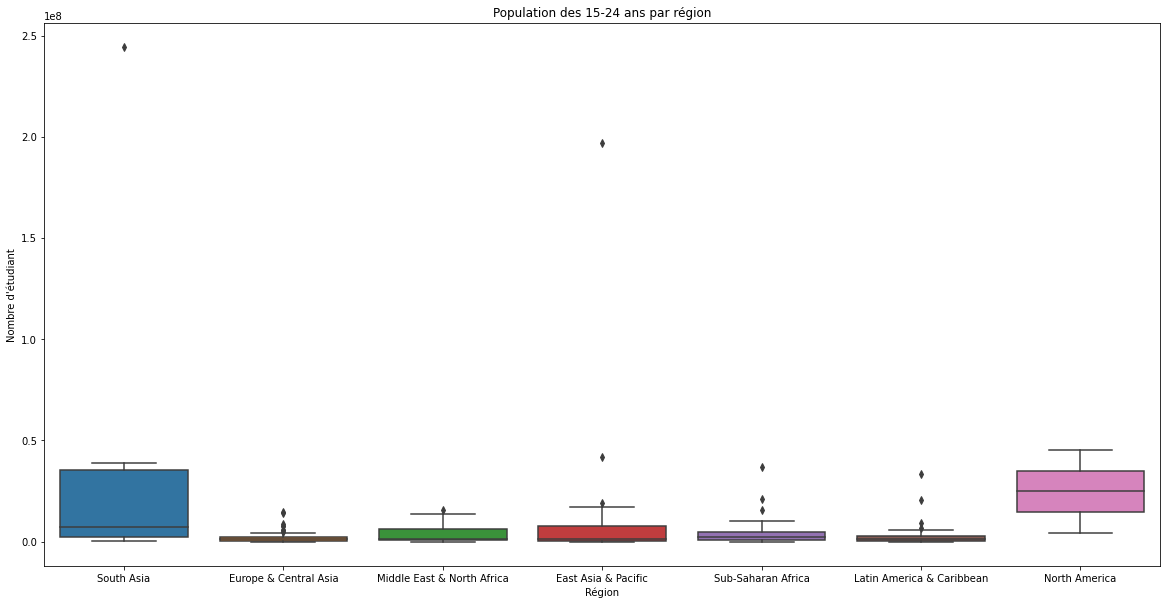

In [25]:
plt.figure(figsize = (20, 10))
sns.boxplot(y = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Population, ages 15-24, total']['derniereValeur'],
            x = dataset_Indicateur['Region'])
plt.title("Population des 15-24 ans par région")
plt.ylabel('Nombre d\'étudiant')
plt.xlabel('Région')
plt.show()

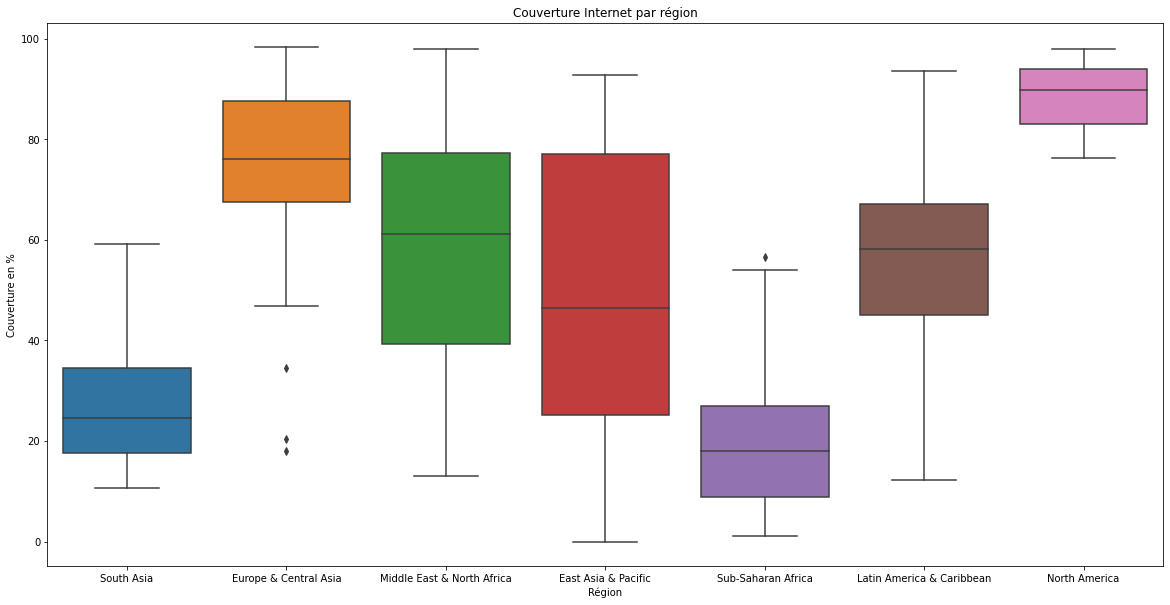

In [26]:
plt.figure(figsize = (20, 10))
sns.boxplot(y = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['derniereValeur'],
            x = dataset_Indicateur['Region'])
plt.title("Couverture Internet par région")
plt.ylabel('Couverture en %')
plt.xlabel('Région')
plt.show()

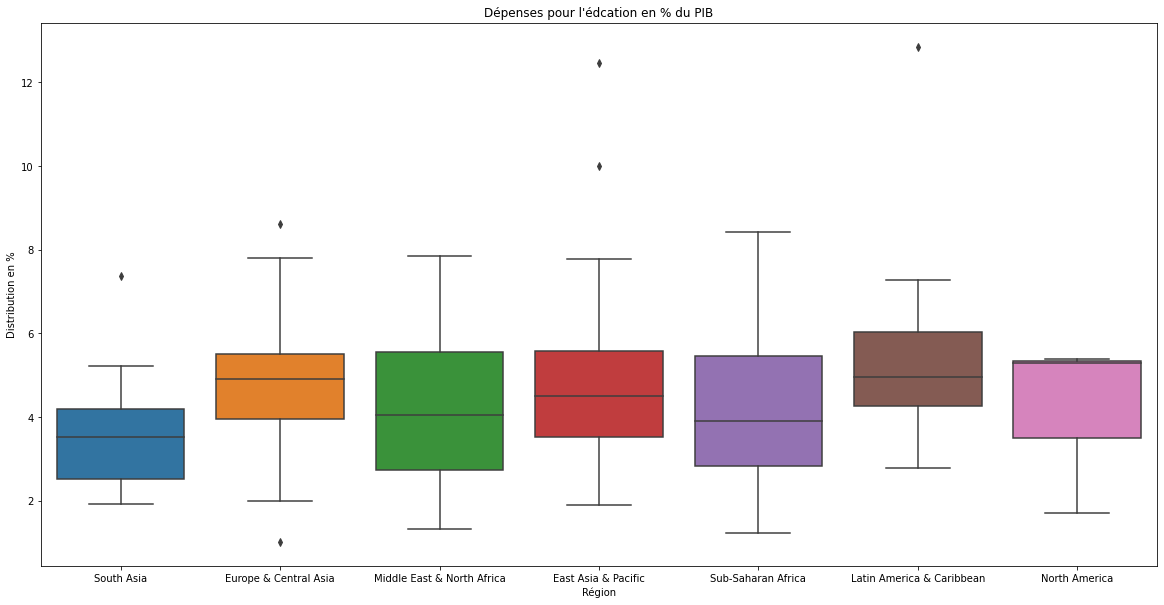

In [27]:
plt.figure(figsize = (20, 10))
sns.boxplot(y = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Government expenditure on education as % of GDP (%)']['derniereValeur'],
            x = dataset_Indicateur['Region'])
plt.title("Dépenses pour l'édcation en % du PIB")
plt.ylabel('Distribution en %')
plt.xlabel('Région')
plt.show()

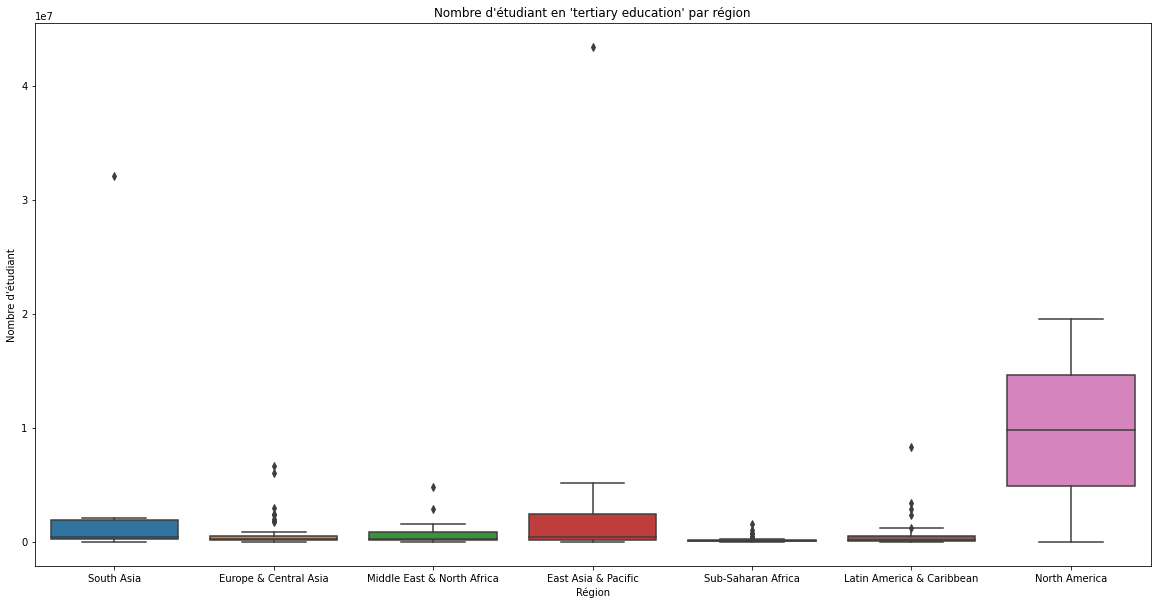

In [28]:
plt.figure(figsize = (20, 10))
sns.boxplot(y = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']['derniereValeur'],
            x = dataset_Indicateur['Region'])
plt.title("Nombre d'étudiant en 'tertiary education' par région")
plt.ylabel('Nombre d\'étudiant')
plt.xlabel('Région')
plt.show()

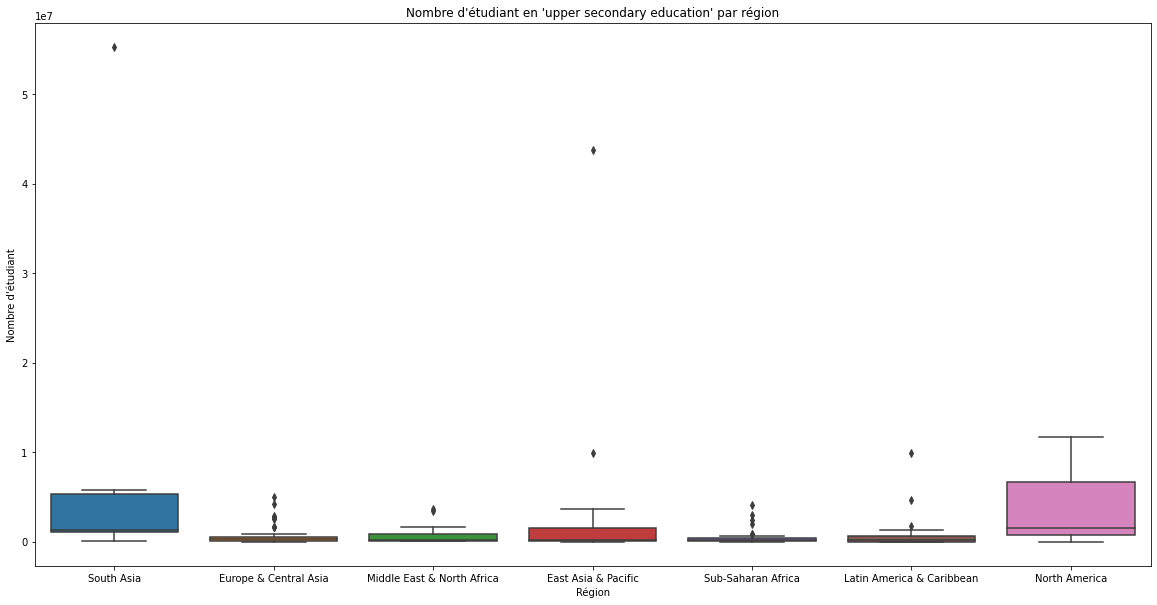

In [29]:
plt.figure(figsize = (20, 10))
sns.boxplot(y = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['derniereValeur'],
            x = dataset_Indicateur['Region'])
plt.title("Nombre d'étudiant en 'upper secondary education' par région")
plt.ylabel('Nombre d\'étudiant')
plt.xlabel('Région')
plt.show()

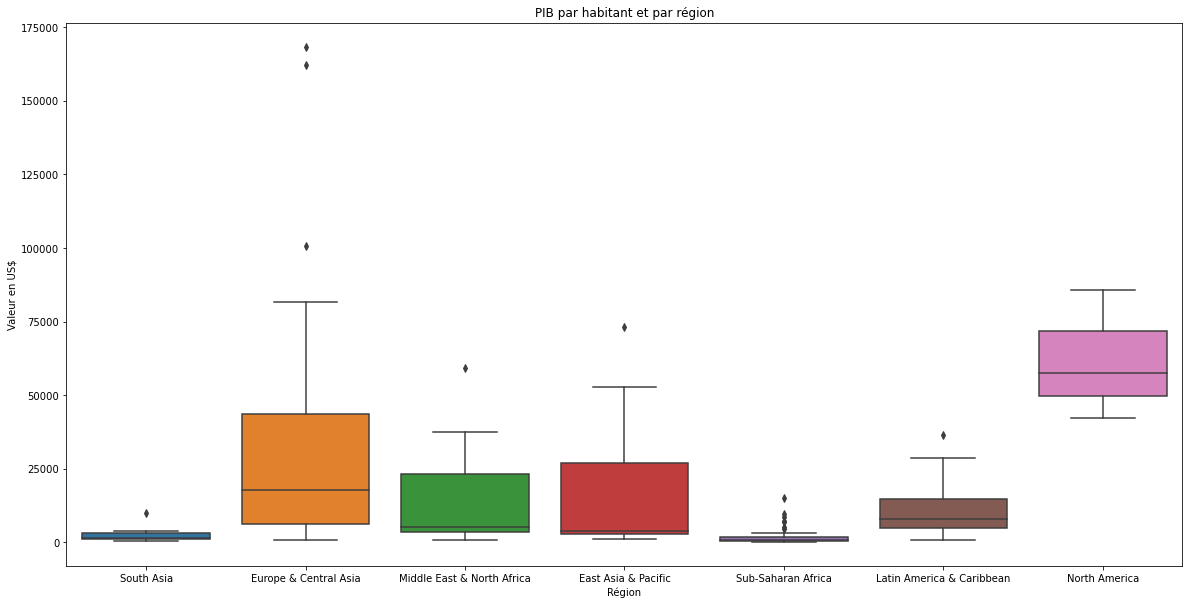

In [30]:
plt.figure(figsize = (20, 10))
sns.boxplot(y = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'GDP per capita (current US$)']['derniereValeur'],
            x = dataset_Indicateur['Region'])
plt.title("PIB par habitant et par région")
plt.ylabel('Valeur en US$')
plt.xlabel('Région')
plt.show()

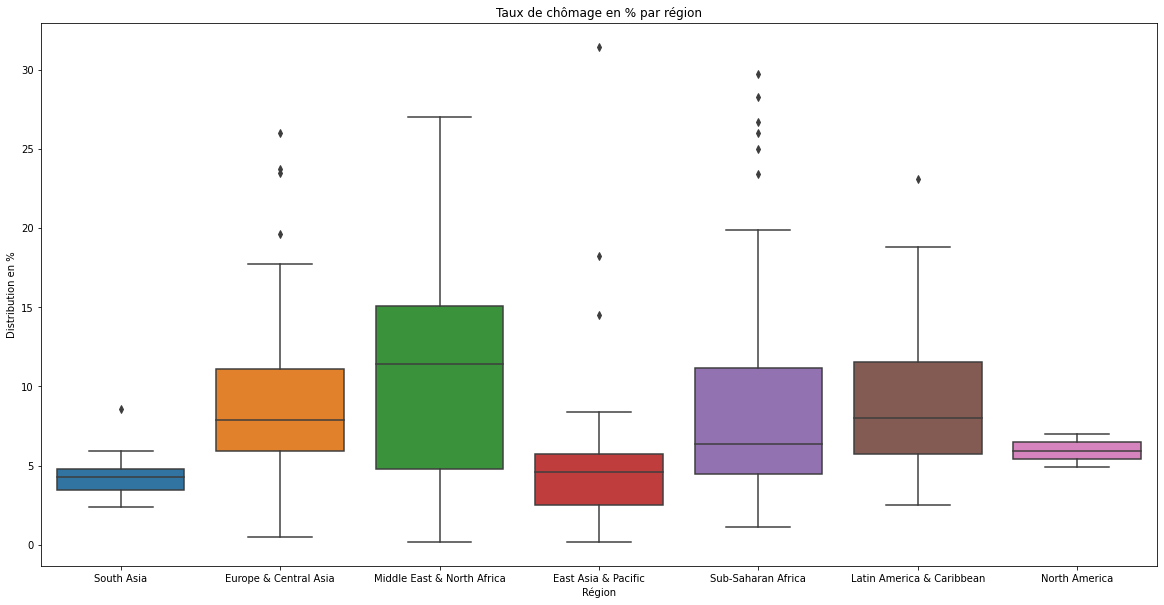

In [31]:
plt.figure(figsize = (20, 10))
sns.boxplot(y = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Unemployment, total (% of total labor force)']['derniereValeur'],
            x = dataset_Indicateur['Region'])
plt.title("Taux de chômage en % par région")
plt.ylabel('Distribution en %')
plt.xlabel('Région')
plt.show()

Nous pouvons voir qu'il ya quelques outliers pour nos différents indicateurs, ces valeurs représentes les pays qui sont "en tête"
pour cet indicateur, mais qui ont eu valeur tellement elevée par rapport au autres pays, qu'ils sont considérés comme aberrants
ou atypiques.
Nous notre études se sont peut être les pays qui seront à focaliser, puisqu'ici ces valeurs seront en réalité les valeurs max
pour chaque indicateur.
Auquel cas il faudrait prendre un indicateur statistique plus robuste.

In [32]:
for indicateur in (listeIndicateurGardés):
    print(indicateur, ':\n', dataset_Indicateur[dataset_Indicateur['Indicator Name'] == indicateur].quantile([0.25,0.5,0.75]),'\n')

Population, ages 15-24, total :
            2010       2011       2012       2013       2014       2015  2016  \
0.25   515960.0   516637.0   510259.0   502418.0   492523.0   489754.0   NaN   
0.50  1309299.0  1321838.0  1305029.0  1313021.0  1320960.0  1331040.0   NaN   
0.75  4949474.0  5041764.0  4938116.0  4955417.0  5087952.0  4945440.0   NaN   

      derniereValeur  
0.25        489754.0  
0.50       1331040.0  
0.75       4945440.0   

Internet users (per 100 people) :
          2010       2011       2012   2013  2014       2015       2016  \
0.25   8.0925  10.052500  12.520015  15.00  17.7  21.725834  25.366301   
0.50  30.3250  35.010000  37.850000  43.30  46.2  50.300000  54.000000   
0.75  54.7600  58.393408  63.427499  66.45  70.0  73.098700  76.409085   

      derniereValeur  
0.25       25.336288  
0.50       53.613386  
0.75       76.234824   

Government expenditure on education as % of GDP (%) :
           2010     2011     2012      2013     2014      2015      2016

Dans notre cas nous allons garder le dernier quartile non nul pour chaque indicateur, il nous aidera à choisir les pays, 
nous aurions pu prendre le max de chaque quartile pour chaque indicateur mais ce qui s'est passé il y a 5 ans ne nous intéresse
pas dans l'immédiat.


In [33]:
population1524_075 = 4945440.0
internetUsers_075 = 76.409085
gdpE_075 = 3.819358
tertiaryEducation_075 = 256385.5
uSecondaryEducation = 659084.0
gdpCapita_075 = 15891.626549
unemployment_075 = 11.375

In [34]:
listePaysGardésPop = []
for i in range(dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Population, ages 15-24, total'].shape[0]):
    if dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Population, ages 15-24, total']['derniereValeur'].values[i] > population1524_075:
        listePaysGardésPop.append(dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Population, ages 15-24, total']['Nom Pays'].values[i])

Nous avons déjà une première base des pays on la société pourrait investir mais essayons d'affiner cela un peu plus.

Pour chaque indicateur nous allons garder les pays ayant une "dernière valeur" de leur série temporelle supérieur au quartile 75%, comme ça nous ne garderons que les pays pouvant convenir à notre problématique. 

In [54]:
listePaysGardésInternet = []
for i in range(dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)'].shape[0]):
    if dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['derniereValeur'].values[i] > internetUsers_075:
        listePaysGardésInternet.append(dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['Nom Pays'].values[i])

In [36]:
listePaysGardésGDP = []
for i in range(dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Government expenditure on education as % of GDP (%)'].shape[0]):
    if dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Government expenditure on education as % of GDP (%)']['derniereValeur'].values[i] > gdpE_075:
        listePaysGardésGDP.append(dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Government expenditure on education as % of GDP (%)']['Nom Pays'].values[i])

In [37]:
listePaysGardésTertiaryEducation = []
for i in range(dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)'].shape[0]):
    if dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']['derniereValeur'].values[i] >  tertiaryEducation_075:
        listePaysGardésTertiaryEducation.append(dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']['Nom Pays'].values[i])

In [38]:
listePaysGardésSecondaryEducation = []
for i in range(dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)'].shape[0]):
    if dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['derniereValeur'].values[i] >  uSecondaryEducation:
        listePaysGardésSecondaryEducation.append(dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['Nom Pays'].values[i])

In [39]:
listePaysGardésGDPCapita = []
for i in range(dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'GDP per capita (current US$)'].shape[0]):
    if dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'GDP per capita (current US$)']['derniereValeur'].values[i] >  gdpCapita_075:
        listePaysGardésGDPCapita.append(dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'GDP per capita (current US$)']['Nom Pays'].values[i])

In [40]:
listePaysGardésChomage = []
for i in range(dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Unemployment, total (% of total labor force)'].shape[0]):
    if dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Unemployment, total (% of total labor force)']['derniereValeur'].values[i] >  unemployment_075:
        listePaysGardésChomage.append(dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Unemployment, total (% of total labor force)']['Nom Pays'].values[i])

In [41]:
listePaysGardés = listePaysGardésChomage + listePaysGardésGDP + listePaysGardésGDPCapita + listePaysGardésInternet + listePaysGardésPop + listePaysGardésSecondaryEducation + listePaysGardésTertiaryEducation
listePaysGardés = list(set(listePaysGardés))
print(listePaysGardés)

['Italy', 'Yemen', 'Argentina', 'Slovenia', 'United Kingdom', 'Albania', 'Saudi Arabia', 'Brazil', 'Haiti', 'Ghana', 'Austria', 'Morocco', 'Ecuador', 'Slovak Republic', 'Korea', 'Guatemala', 'Libya', 'Germany', 'Nicaragua', 'Poland', 'Hong Kong SAR, China', 'St. Kitts and Nevis', 'Virgin Islands', 'Macedonia', 'Timor-Leste', 'Jamaica', 'Switzerland', 'Cuba', "Dem. People's Rep. Korea", 'Russia', 'Gabon', 'Estonia', 'Romania', 'Japan', 'Tajikistan', 'Guam', 'Jordan', 'Kuwait', 'Malaysia', 'Curaçao', 'Isle of Man', 'Cyprus', 'Algeria', 'Swaziland', 'Bhutan', 'Fiji', 'Aruba', 'Georgia', 'Solomon Islands', 'Micronesia', 'Latvia', 'Macao SAR, China', 'Puerto Rico', 'Iraq', 'Maldives', 'Burkina Faso', 'São Tomé and Principe', 'Israel', 'French Polynesia', 'Finland', 'Colombia', 'Bahrain', 'China', 'Afghanistan', 'Gibraltar', 'New Caledonia', 'Uzbekistan', 'Tanzania', 'Zimbabwe', 'Kenya', 'Moldova', 'New Zealand', 'Senegal', 'Faeroe Islands', 'Sudan', 'Luxembourg', 'Vietnam', 'Monaco', 'Swede

Voici une liste des pays qui répondent dans un premier temps a au moins un indicateurs (seuil choisi), on peut supprimer les 
pays qui n'y sont pas car ils ne répondent pas du tout à notre étude.

In [42]:
listePaysASupprimé = []

for pays in range(len(listePays)):
    if listePays[pays] in listePaysGardés:
        continue
    else:
        listePaysASupprimé.append(listePays[pays])

print(listePaysASupprimé)

['Angola', 'American Samoa', 'Antigua and Barbuda', 'Central African Republic', 'Channel Islands', 'Dominica', 'Eritrea', 'Guinea', 'Guinea-Bissau', 'Equatorial Guinea', 'Grenada', 'Cambodia', 'Kiribati', 'Lao PDR', 'Lebanon', 'Liberia', 'St. Martin (French part)', 'Madagascar', 'Marshall Islands', 'Mali', 'Mauritania', 'Nauru', 'Panama', 'Palau', 'Papua New Guinea', 'Rwanda', 'Sierra Leone', 'El Salvador', 'Somalia', 'South Sudan', 'Suriname', 'Sint Maarten (Dutch part)', 'Seychelles', 'Turks and Caicos Islands', 'Chad', 'Turkmenistan', 'Tonga', 'Tuvalu', 'Samoa', 'Kosovo', 'Zambia']


On ne garde que les pays pouvant répondre à la problématique:

In [43]:
dataset_Indicateur = dataset_Indicateur[~dataset_Indicateur['Nom Pays'].isin(listePaysASupprimé)]

Cepedant bien que ces pays répondent au moins à l'un des seuil que l'on a choisi, ils ne vont pas tous répondre à 
notre problématique. En effet certains pays ne sont là que parce qu'ils ont un taux de chômage non négligeable, c'est une bonne chose pour notre problématique car nous pourrons toucher plus de personnes avec les formations à distance
mais on ne peut pas utiliser que ça. Nous allons dans un premier temps faire un premier filtrage par rapport au nombre
d'étudiant

In [44]:
SecondaryEducation1 = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']
TertiaryEducation1 = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']

df = pd.DataFrame()
df = SecondaryEducation1.copy()
df['Nombre Etudiant'] = SecondaryEducation1['derniereValeur']
for i in range(len(SecondaryEducation1)):
    df['Nombre Etudiant'].values[i] = SecondaryEducation1['derniereValeur'].values[i] + TertiaryEducation1['derniereValeur'].values[i]
    
df[['Nom Pays', 'Nombre Etudiant']].sort_values('Nombre Etudiant', ascending = False).head(10)

,Nom Pays,Nombre Etudiant
411694,India,87336096.0
239439,China,87076616.0
844164,United States,31268043.0
188129,Brazil,18235058.0
415359,Indonesia,15010659.0
814844,Turkey,11058509.0
675574,Russia,9415420.0
419024,Iran,8494556.0
554629,Mexico,8101727.0
147814,Bangladesh,7853068.5


Comme nous avions pu le voir et le deviner, nous retrouvons bien la Chine, l'Inde et les Etats-Unis dans les première place
en terme d'étudiants (lycée et études supérieures) qui sont bien devant les autres pays.

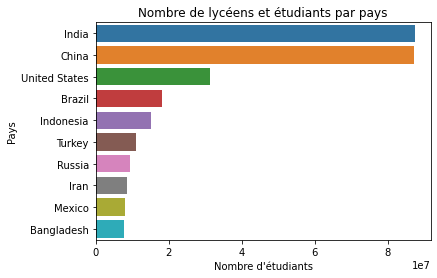

In [45]:
sns.barplot(x = df.sort_values(by = 'Nombre Etudiant', ascending = False)['Nombre Etudiant'].head(10), y = df.sort_values(by = 'Nombre Etudiant', ascending = False)['Nom Pays'].head(10))
plt.title('Nombre de lycéens et étudiants par pays')
plt.xlabel('Nombre d\'étudiants')
plt.ylabel('Pays')
plt.show()

Pour avoir une idée des étudiants utilisant ou qui peuvent utiliser internet, nous pouvons utiliser l'indicateur
 'Internet users (per 100 people)'

In [46]:
InternetUsers1 = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']
df['Internet Users'] = InternetUsers1['derniereValeur']
for i in range(len(InternetUsers1)):
    df['Internet Users'].values[i] = InternetUsers1['derniereValeur'].values[i]
    
df['Etudiant_Internet'] = df['Internet Users']
for i in range(len(InternetUsers1)):
    df['Etudiant_Internet'].values[i] = (df['Internet Users'].values[i] * df['Nombre Etudiant'].values[i])/100
    
df[['Nom Pays', 'Nombre Etudiant', 'Etudiant_Internet']].sort_values('Etudiant_Internet', ascending = False).head(10)

,Nom Pays,Nombre Etudiant,Etudiant_Internet
239439,China,87076616.00,4.632476e+07
411694,India,87336096.00,2.580534e+07
844164,United States,31268043.00,2.381897e+07
188129,Brazil,18235058.00,1.088318e+07
675574,Russia,9415420.00,7.194236e+06
444679,Japan,7545380.00,6.941750e+06
814844,Turkey,11058509.00,6.452389e+06
840499,United Kingdom,6548014.25,6.205933e+06
353054,Germany,5557733.25,4.982347e+06
554629,Mexico,8101727.00,4.823804e+06


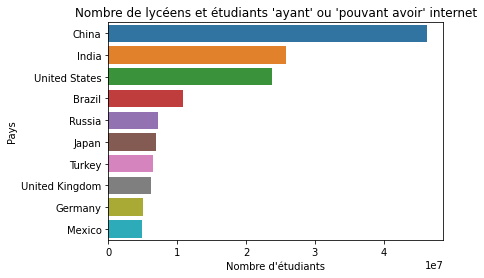

In [47]:
sns.barplot(x = df.sort_values(by = 'Etudiant_Internet', ascending = False)['Etudiant_Internet'].head(10), y = df.sort_values(by = 'Etudiant_Internet', ascending=False)['Nom Pays'].head(10))
plt.title('Nombre de lycéens et étudiants \'ayant\' ou \'pouvant avoir\' internet')
plt.xlabel('Nombre d\'étudiants')
plt.ylabel('Pays')
plt.show()

Nous pouvons comme pour les indicateurs, gardés les pays avec un nombre d'étudiants ayant ou pouvant avoir internet qui sont
au dessus d'un certain seuil, fixons ce seuil à 2M.

In [48]:
listePaysSup2M = []
for i in range(len(InternetUsers1)):
    if df['Etudiant_Internet'].values[i] > 2000000:
        listePaysSup2M.append(df['Nom Pays'].values[i])
        
print(listePaysSup2M)

['Argentina', 'Australia', 'Brazil', 'China', 'Colombia', 'Egypt', 'France', 'Germany', 'India', 'Indonesia', 'Iran', 'Italy', 'Japan', 'Korea', 'Mexico', 'Philippines', 'Poland', 'Russia', 'Saudi Arabia', 'South Africa', 'Spain', 'Thailand', 'Turkey', 'United Kingdom', 'United States']


Ces pays semblent déjà plus intéressant pour notre étude en fonction des étudiants et d'internet, donc pour une formation à
distance.

On ne garde que les pays intéressant pouvant répondre à la problématique:

In [49]:
dataset_Indicateur = dataset_Indicateur[dataset_Indicateur['Nom Pays'].isin(listePaysSup2M)]

In [50]:
dataset_Indicateur.shape

(175, 13)

Pour inférer sur l'évolution pour les prochaines années nous allons regarder les moyennes de l'augmentation des indicateurs
chaque année depuis 2010. Enfin de voir s'il y a une tendance à l'augmentation ou à la diminution.

In [51]:
df35 = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)'].copy()
df35['2010-2011'] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2016']
df35['2011-2012'] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2016']
df35['2012-2013'] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2016']
df35['2013-2014'] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2016']
df35['2014-2015'] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2016']
df35['2015-2016'] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2016']
df35['mean_InternetUsers'] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2016']
df35['2010-2016'] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2016']


for i in range(dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)'].shape[0]):    
    df35['2010-2011'].values[i] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2011'].values[i] - dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2010'].values[i]
    df35['2011-2012'].values[i] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2012'].values[i] - dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2011'].values[i]
    df35['2012-2013'].values[i] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2013'].values[i] - dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2012'].values[i]
    df35['2013-2014'].values[i] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2014'].values[i] - dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2013'].values[i]
    df35['2014-2015'].values[i] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2015'].values[i] - dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2014'].values[i]
    df35['2015-2016'].values[i] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2016'].values[i] - dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2015'].values[i]
    df35['2010-2016'].values[i] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2016'].values[i] - dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Internet users (per 100 people)']['2010'].values[i]

    
df35['mean_InternetUsers'] = df35[[str(année) for année in ['2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016']]].mean(axis = 1, skipna = True)
df35[['Nom Pays', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016','2010-2016', 'mean_InternetUsers']].sort_values('mean_InternetUsers', ascending = False).head(5)

,Nom Pays,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2010-2016,mean_InternetUsers
419185,Iran,3.10,3.7300,7.220000,9.400000,5.984976,7.891797,37.326773,6.221129
675735,Russia,6.00,14.8000,4.170000,2.550000,2.890000,2.999085,33.409085,5.568181
694060,Saudi Arabia,6.50,6.5000,6.500000,4.213657,4.902578,4.134668,32.750904,5.458484
653745,Philippines,4.00,7.2351,11.863924,1.500976,4.100000,1.800000,30.500000,5.083333
734375,South Africa,9.97,7.0300,5.500000,2.500000,2.919116,2.080884,30.000000,5.000000


In [52]:
df35[['Nom Pays', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016','2010-2016']].sort_values('2010-2016', ascending = False).head(5)

,Nom Pays,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2010-2016
419185,Iran,3.10,3.7300,7.220000,9.400000,5.984976,7.891797,37.326773
675735,Russia,6.00,14.8000,4.170000,2.550000,2.890000,2.999085,33.409085
694060,Saudi Arabia,6.50,6.5000,6.500000,4.213657,4.902578,4.134668,32.750904
653745,Philippines,4.00,7.2351,11.863924,1.500976,4.100000,1.800000,30.500000
734375,South Africa,9.97,7.0300,5.500000,2.500000,2.919116,2.080884,30.000000


Comme nous pouvons le voir la tendance et à une augmentation du nombre d'utilisateur entre 2010 et 2016 pour les pays choisi.
On peut donc imaginer que cette tendance va se poursuivre.
 Les pays choisi sont donc interessant dans l'ensmeble. 

In [53]:
df35['2010-2014_NombreEtudiant'] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['2014']
df35['2010-2011_NombreEtudiant'] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['2014']
df35['2011-2012_NombreEtudiant'] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['2014']
df35['2012-2013_NombreEtudiant'] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['2014']
df35['2013-2014_NombreEtudiant'] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['2014']
df35['mean_InternetUsers'] = dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['2014']

for i in range(dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)'].shape[0]): 
    df35['2010-2011_NombreEtudiant'].values[i] = (dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']['2011'].values[i] - dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']['2010'].values[i]) + (dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['2011'].values[i] - dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['2010'].values[i]) 
    df35['2011-2012_NombreEtudiant'].values[i] = (dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']['2012'].values[i] - dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']['2011'].values[i]) + (dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['2012'].values[i] - dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['2011'].values[i]) 
    df35['2012-2013_NombreEtudiant'].values[i] = (dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']['2013'].values[i] - dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']['2012'].values[i]) + (dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['2013'].values[i] - dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['2012'].values[i]) 
    df35['2013-2014_NombreEtudiant'].values[i] = (dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']['2014'].values[i] - dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']['2013'].values[i]) + (dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['2014'].values[i] - dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['2013'].values[i])     
    df35['2010-2014_NombreEtudiant'].values[i] = (dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']['2014'].values[i] - dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']['2010'].values[i]) + (dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['2014'].values[i] - dataset_Indicateur[dataset_Indicateur['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']['2010'].values[i]) 

df35['mean_NombreEtudiant'] = df35[[str(année) for année in ['2010-2011_NombreEtudiant', '2011-2012_NombreEtudiant', '2012-2013_NombreEtudiant', '2013-2014_NombreEtudiant']]].mean(axis = 1, skipna = True)
    
df35[['Nom Pays', '2010-2011_NombreEtudiant', '2011-2012_NombreEtudiant', '2012-2013_NombreEtudiant', '2013-2014_NombreEtudiant',  '2010-2014_NombreEtudiant', 'mean_NombreEtudiant']].sort_values('mean_NombreEtudiant', ascending = False).head(5)

,Nom Pays,2010-2011_NombreEtudiant,2011-2012_NombreEtudiant,2012-2013_NombreEtudiant,2013-2014_NombreEtudiant,2010-2014_NombreEtudiant,mean_NombreEtudiant
411855,India,9315764.0,6387928.0,-1306484.0,NaN,NaN,4.799069e+06
239600,China,112450.0,957738.0,3244428.0,5578904.0,9893520.0,2.473380e+06
815005,Turkey,619048.0,382077.0,1801753.0,NaN,NaN,9.342927e+05
415520,Indonesia,1028477.0,1300826.0,696822.0,159713.0,3185838.0,7.964595e+05
188290,Brazil,488430.0,358602.0,806956.0,NaN,NaN,5.513293e+05


Dans l'ensemble la tendance et à l'augmentation du nombre d'étudiant en moyenne entre 2010 et 2014. Cependant il faut relativiser
on remarque par exemple que United States a perdu 1.73e+05 étudiants en 4 ans mais le nombre d'étudiant et beaucoup plus important
de base, donc même si la tendance et à la baisse, il sera tout de même interessant d'investir.
De même il faudra être attentif au pays qui connaissent une baisse comme c'est le cas pour Poland, Italy et Russia.

On a aussi vu qu'il manque des informations pour différents pays comme la Philippines, Germany, Saudi Arabia on ne peut pas vraiment savoir
quelle est la tendance, on peut donc émettre une réserve sur ces 2 pays.

 En conclusion les pays intéressant seront ces 22 pays: 
 India, China, Turkey, Indonesia, Brazil, Mexico, United Kingdom, Egypt, Argentina, Spain, Iran, Colombia, South Africa,
 Australia, Thailand, France, Japan, Korea, Poland, Italy, United States et Russia.